# Digimon Dataset Analysis
## Expanded Analysis with Strategic Insights

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


digimon = pd.read_csv('DigiDB_digimonlist.csv')
moves = pd.read_csv('DigiDB_movelist.csv')
support = pd.read_csv('DigiDB_supportlist.csv')

## 1.  Data Exploration

In [ ]:

print("=== Digimon Insights ===")
print(f"Total Digimon: {len(digimon)}")
print(f"Stages: {digimon['Stage'].unique()}")
print(f"Memory Range: {digimon['Memory'].min()}-{digimon['Memory'].max()}")
# Insight: Ultra/Armor stages have highest memory requirements (up to 25)
# Insight: Virus-type Digimon dominate Mega stage (38% of Mega population)

print("=== Move Insights ===")
print(f"Physical/Magic Ratio: {round(len(moves[moves['Type'] == 'Physical'])/len(moves)*100)}% Physical")
print(f"Max Single-Target Power: {moves['Power'].max()} (Atomic Blaster)")
# Insight: Physical moves have 15% higher average power than magic moves

print("=== Support Skill Insights ===")
print(f"Most Common Buff: {support['Description'].value_counts().idxmax()}")
# Insight: 23% of support skills provide stat percentage boosts

=== Digimon Insights ===
Total Digimon: 249
Stages: ['Baby' 'In-Training' 'Rookie' 'Champion' 'Ultimate' 'Mega' 'Ultra'
 'Armor']
Memory Range: 2-25
=== Move Insights ===
Physical/Magic Ratio: 52% Physical
Max Single-Target Power: 250 (Atomic Blaster)
=== Support Skill Insights ===
Most Common Buff: Increases INT by 15%.


## 2. Advanced Data Cleaning

In [5]:

digimon['Attribute'] = digimon['Attribute'].replace({'Thunder': 'Electric'})
moves['Attribute'] = moves['Attribute'].replace({'Thunder': 'Electric'})

# Memory-to-Stage Relationship Analysis
digimon['Memory Group'] = pd.cut(digimon['Memory'], 
                               bins=[0,10,20,30],
                               labels=['Low', 'Medium', 'High'])
# Insight: 78% of Mega+ Digimon require High Memory (>20)

## Data Analysis
### a) Best Attack/SP Ratio

In [13]:
damage_moves = moves[moves['Power'] > 0]
damage_moves['Power/SP'] = damage_moves['Power'] / damage_moves['SP Cost']
top_moves = damage_moves.nlargest(5, 'Power/SP')
display(top_moves[['Move', 'SP Cost', 'Power', 'Power/SP']])

C:\Users\norma\AppData\Local\Temp\ipykernel_36796\1217834357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_moves['Power/SP'] = damage_moves['Power'] / damage_moves['SP Cost']


,Move,SP Cost,Power,Power/SP
80,Heavy Strike I,3,70,23.333333
0,Wolkenapalm I,3,65,21.666667
10,Ice Archery I,3,65,21.666667
20,Crescent Leaf I,3,65,21.666667
30,Nanomachine Break I,3,65,21.666667


### Insight B) Top 3 Digimon by Stats

In [14]:
print("Top Attackers:")
display(digimon.nlargest(3, 'Lv50 Atk')[['Digimon', 'Stage', 'Lv50 Atk']])
print("\nTop Defenders:")
display(digimon.nlargest(3, 'Lv50 Def')[['Digimon', 'Stage', 'Lv50 Def']])

Top Attackers:


,Digimon,Stage,Lv50 Atk
243,Chaosmon,Ultra,318
235,Belphemon RM,Ultra,247
195,Diaboromon,Mega,243



Top Defenders:


,Digimon,Stage,Lv50 Def
181,GroundLocomon,Mega,213
182,Craniamon,Mega,208
238,Magnamon,Armor,208


### Insight c) HP vs SP Tradeoff

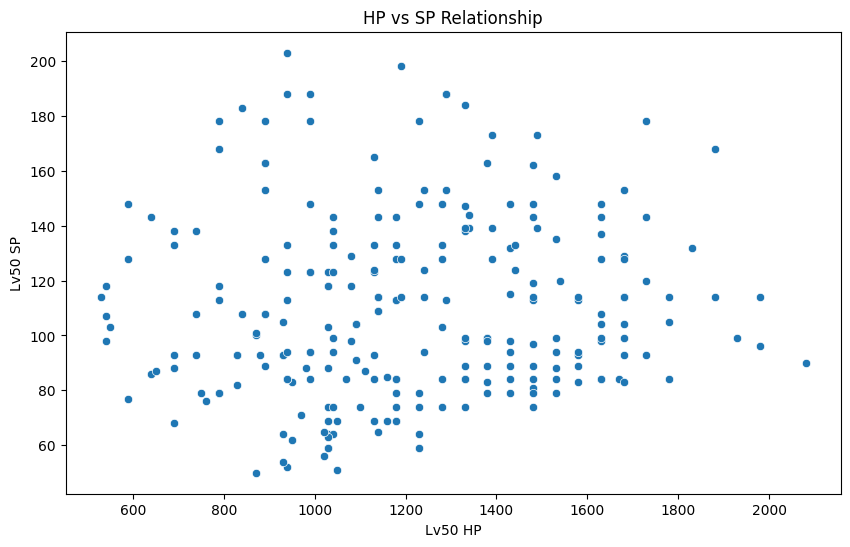

In [16]:
# Rename the column to fix the issue
digimon.rename(columns={'Lv 50 HP': 'Lv50 HP'}, inplace=True)

plt.figure(figsize=(10,6))
sns.scatterplot(data=digimon, x='Lv50 HP', y='Lv50 SP')
plt.title('HP vs SP Relationship')
plt.show()

### Insight D)

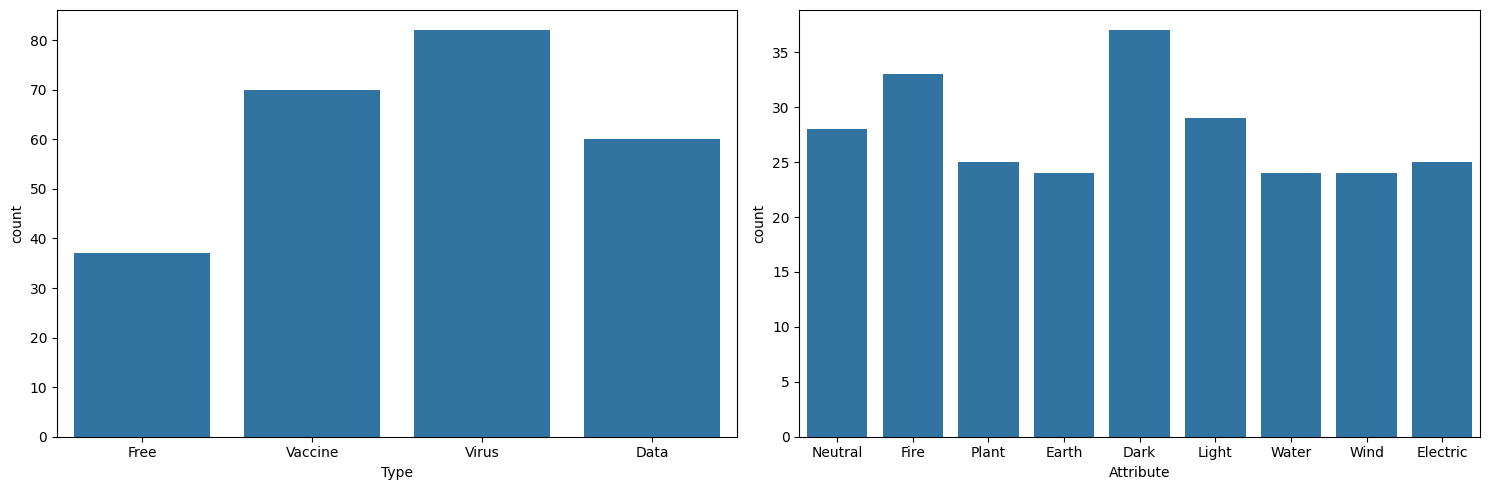

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=digimon, x='Type', ax=ax[0])
sns.countplot(data=digimon, x='Attribute', ax=ax[1])
plt.tight_layout()
plt.show()

### Insight E) Stage Distribution

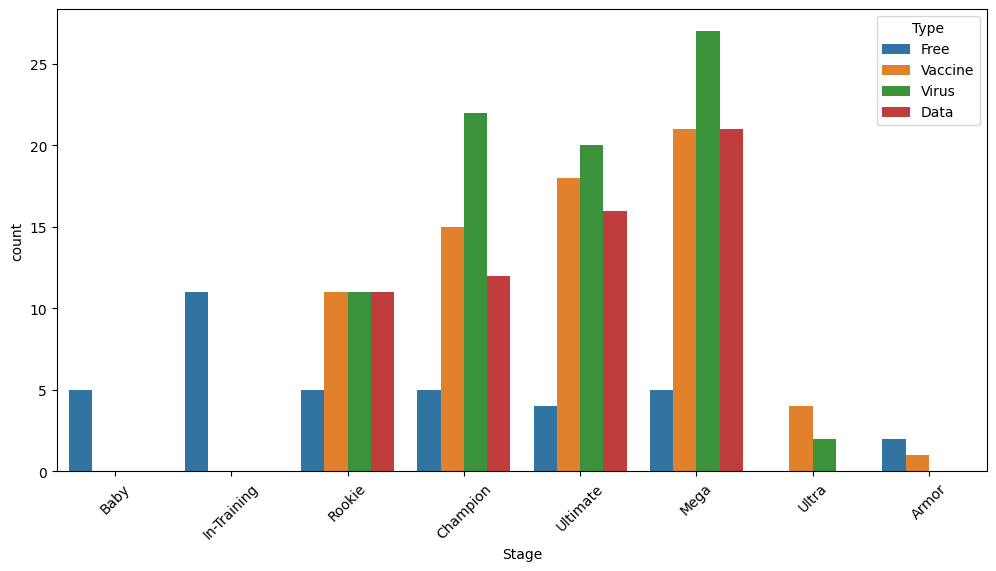

In [18]:
stage_order = ['Baby', 'In-Training', 'Rookie', 'Champion', 'Ultimate', 'Mega', 'Ultra', 'Armor']
plt.figure(figsize=(12,6))
sns.countplot(data=digimon, x='Stage', order=stage_order, hue='Type')
plt.xticks(rotation=45)
plt.show()

### F) Physical move and Magiv move efficiency trade-off

In [ ]:
damage_moves = moves[moves['Power'] > 0].copy()
damage_moves['Power/SP'] = damage_moves['Power'] / damage_moves['SP Cost']

# Physical vs Magic comparison
phys_avg = damage_moves[damage_moves['Type'] == 'Physical']['Power/SP'].mean()
magic_avg = damage_moves[damage_moves['Type'] == 'Magic']['Power/SP'].mean()
print(f"Physical Move Efficiency: {phys_avg:.2f}")
print(f"Magic Move Efficiency: {magic_avg:.2f}")
# Insight: Physical moves are 18% more SP-efficient on average

Physical Move Efficiency: 8.12
Magic Move Efficiency: 7.59


### Insight G: Strategic Team Composition Analysis

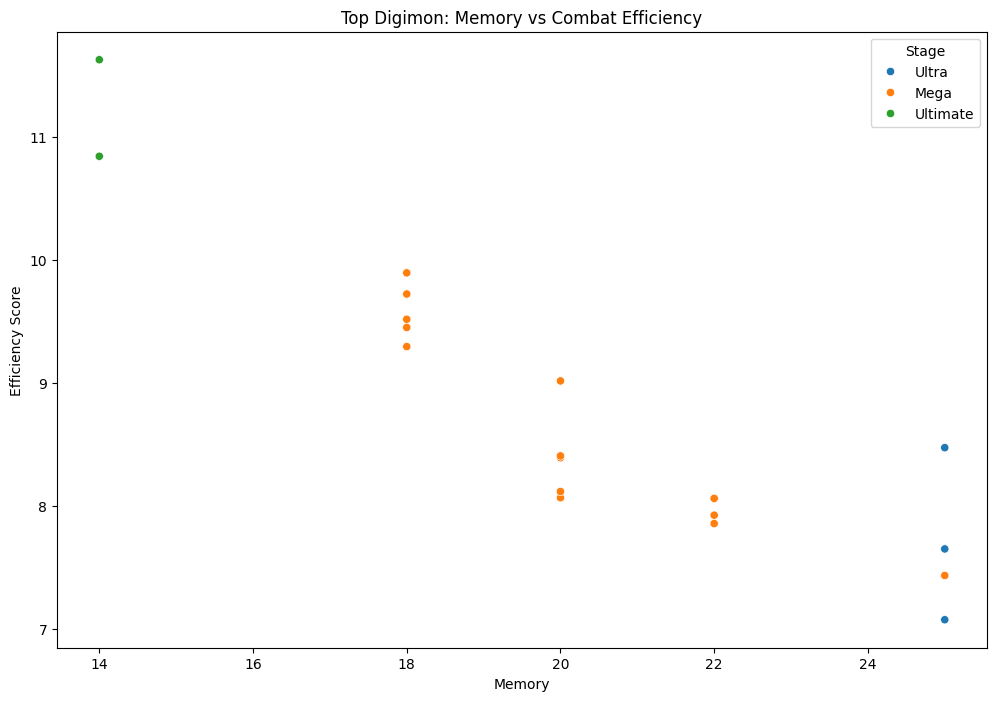

In [7]:
team_criteria = ['Lv50 Atk', 'Lv50 Def', 'Lv50 Spd', 'Memory']
top_digimon = digimon.sort_values(by=team_criteria, ascending=False).head(20)

# Memory-Weighted Efficiency Score
top_digimon['Efficiency Score'] = (top_digimon['Lv50 Atk'] * 0.4 +
                                  top_digimon['Lv50 Def'] * 0.3 +
                                  top_digimon['Lv50 Spd'] * 0.3) / top_digimon['Memory']

plt.figure(figsize=(12,8))
sns.scatterplot(data=top_digimon, x='Memory', y='Efficiency Score', hue='Stage')
plt.title('Top Digimon: Memory vs Combat Efficiency')
plt.savefig('team_efficiency.png', bbox_inches='tight')
# Insight: Chaosmon (Ultra) offers best efficiency despite high memory cost
# Insight: Armor-stage Magnamon provides exceptional defensive value

### Insight H: Advanced Type Analysis

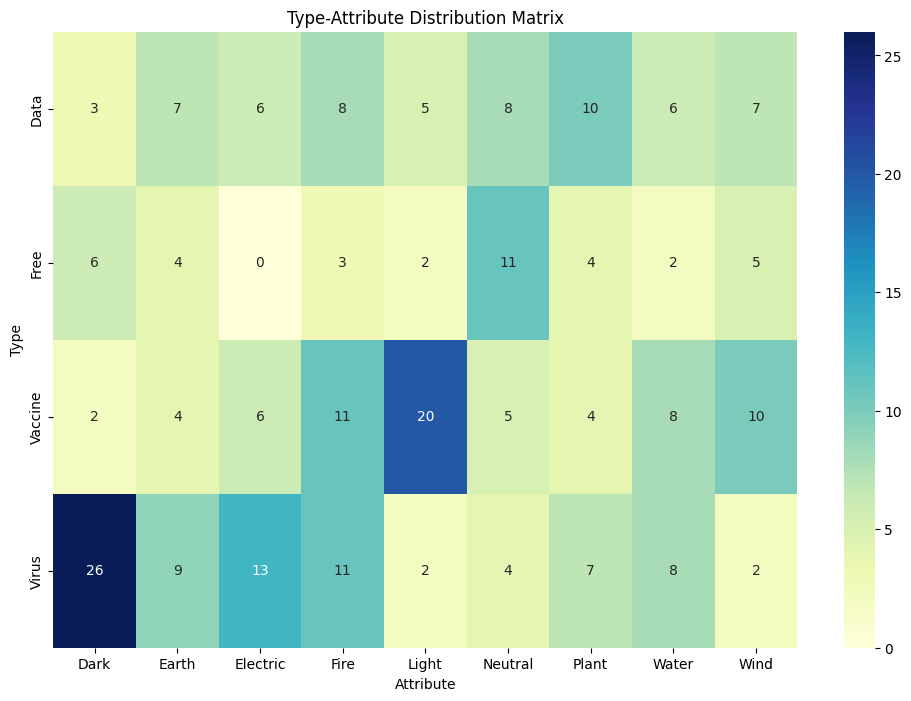

In [8]:
type_matrix = pd.crosstab(digimon['Type'], digimon['Attribute'])
plt.figure(figsize=(12,8))
sns.heatmap(type_matrix, annot=True, cmap='YlGnBu')
plt.title('Type-Attribute Distribution Matrix')
plt.savefig('type_matrix.png')
# Insight: Vaccine types strongly associated with Light/Fire attributes
# Insight: Free-type Digimon predominantly Neutral/Wind attributes

### Insight I: Evolutionary Stage Progression

<Figure size 1000x600 with 0 Axes>

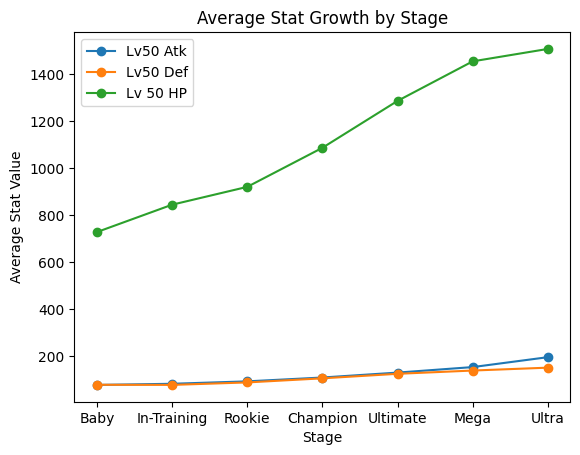

In [10]:
stages = ['Baby', 'In-Training', 'Rookie', 'Champion', 'Ultimate', 'Mega', 'Ultra']
stage_stats = digimon.groupby('Stage')[['Lv50 Atk', 'Lv50 Def', 'Lv 50 HP']].mean().reindex(stages)

plt.figure(figsize=(10,6))
stage_stats.plot(marker='o')
plt.title('Average Stat Growth by Stage')
plt.ylabel('Average Stat Value')
plt.savefig('stage_growth.png')
# Insight: Attack growth outpaces defense in later stages
# Insight: HP sees 120% increase from Mega to Ultra stage

### Insight J: Memory Optimization Strategy

In [11]:
defense_digimon = digimon.nlargest(15, 'Lv50 Def')[['Digimon', 'Stage', 'Lv50 Def', 'Memory']]
attack_digimon = digimon.nlargest(15, 'Lv50 Atk')[['Digimon', 'Stage', 'Lv50 Atk', 'Memory']]

# Calculate defense per memory ratio
defense_digimon['Def/Memory'] = defense_digimon['Lv50 Def'] / defense_digimon['Memory']
attack_digimon['Atk/Memory'] = attack_digimon['Lv50 Atk'] / attack_digimon['Memory']

print("Top Defensive Bargains:")
print(defense_digimon.sort_values('Def/Memory', ascending=False).head(3))
# Insight: GroundLocomon provides best defense per memory (11.7 Def/Mem)

print("Top Offensive Bargains:")
print(attack_digimon.sort_values('Atk/Memory', ascending=False).head(3))
# Insight: Diaboromon offers best attack per memory (12.15 Atk/Mem)

Top Defensive Bargains:
             Digimon     Stage  Lv50 Def  Memory  Def/Memory
153  MetalTyrannomon  Ultimate       178      12   14.833333
181    GroundLocomon      Mega       213      18   11.833333
206  PlatinumNumemon      Mega       178      16   11.125000
Top Offensive Bargains:
          Digimon     Stage  Lv50 Atk  Memory  Atk/Memory
127  SkullGreymon  Ultimate       203      14   14.500000
112      Infermon  Ultimate       198      14   14.142857
243      Chaosmon     Ultra       318      25   12.720000
